<a href="https://colab.research.google.com/github/jairomartinezgiraldo/CNN/blob/main/Actividad_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/
Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
yoga-posture-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Total de clases: 47
Clases encontradas:
['Malasana', 'Bitilasana', 'Phalakasana', 'Virabhadrasana One', 'Parsva Virabhadrasana', 'Salamba Bhujangasana', 'Navasana', 'Trikonasana', 'Setu Bandha Sarvangasana', 'Vrksasana', 'Garudasana', 'Paschimottanasana', 'Supta Kapotasana', 'Eka Pada Rajakapotasana', 'Adho Mukha Vrksasana', 'Vasisthasana', 'Anjaneyasana', 'Ustrasana', 'Camatkarasana', 'Upavistha Konasana', 'Alanasana', 'Utthita Parsvakonasana', 'Ardha Navasana', 'Ardha Matsyendrasana', 'Utthita Hasta Padangusthasana', 'Padmasana', 'Hanumanasana', 'Urdhva Dhanurasana', 'Marjaryasana', 'Baddha Konasana', 'Sivasana', 'Uttanasana', 'Bakasana', 'Halasana', 'Urdhva Mukha Svsnssana', 'Dhanurasana', 'Ardha Pincha Mayurasana', 'Virabhadrasana Two', 'Pincha Mayuras

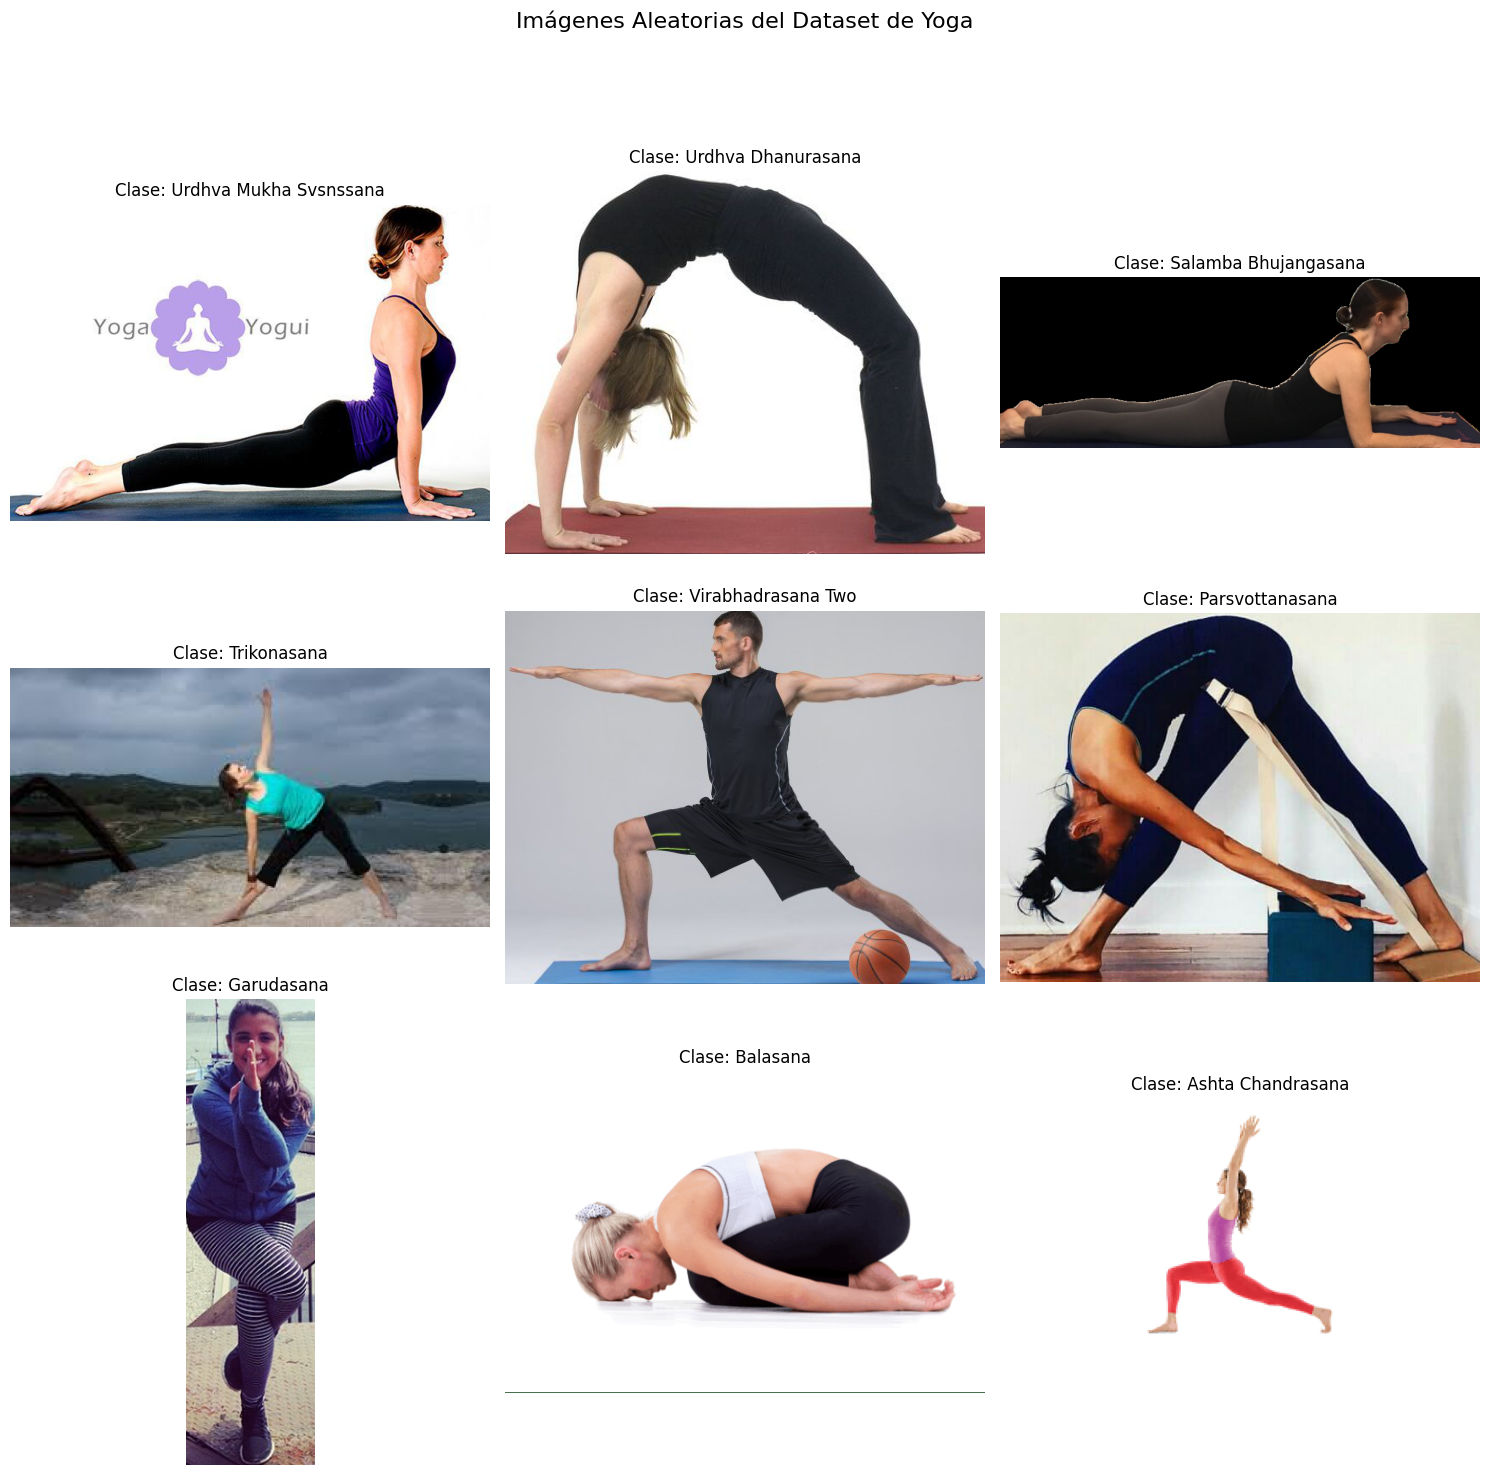

Tamaño del conjunto de datos: (2758, 224, 224, 3), (2758,)
Tamaño de X_train: (2206, 224, 224, 3), y_train: (2206, 47)
Tamaño de X_val: (552, 224, 224, 3), y_val: (552, 47)


In [5]:
# Paso 1: Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

BASE_FOLDER = '/content/drive/My Drive/YogaPoseClassification/'  # Asegúrate de que la carpeta del proyecto esté en Google Drive

# Paso 2: Descargar el Dataset de Yoga
!mkdir -p /content/my_dataset


# Descargar el dataset de Kaggle
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

# Descomprimir el dataset
tar_file_path = '/content/yoga-posture-dataset.zip'
import zipfile
zip_ref = zipfile.ZipFile(tar_file_path, 'r')
zip_ref.extractall('/content/my_dataset')
zip_ref.close()

# Paso 3: Analizar el Dataset
import os

# Definir la ruta base del dataset
base_dir = '/content/my_dataset'

# Verificar las subcarpetas dentro del dataset
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
print(f"Total de clases: {len(subfolders)}")
print("Clases encontradas:")
print(subfolders)

# Contar el número de imágenes en cada clase
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Clase: {subfolder}, Número de imágenes: {num_images}")

# Paso 4: Visualizar Imágenes Aleatorias
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Mostrar una cuadrícula de imágenes aleatorias
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Imágenes Aleatorias del Dataset de Yoga', fontsize=16)

for ax in axes.flatten():
    # Seleccionar una subcarpeta aleatoria
    chosen_folder = np.random.choice(subfolders)
    subfolder_path = os.path.join(base_dir, chosen_folder)

    # Escoger un índice aleatorio entre las imágenes disponibles en la subcarpeta seleccionada
    img_name = np.random.choice(os.listdir(subfolder_path))
    img_path = os.path.join(subfolder_path, img_name)

    # Cargar la imagen y convertirla a RGB
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Clase: {chosen_folder}")
    else:
        ax.set_title('Imagen no encontrada')
        ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Paso 5: Preparar el Dataset para el Entrenamiento
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Definir el tamaño de las imágenes (ejemplo: 224x224)
IMG_SIZE = (224, 224)

# Crear listas para almacenar imágenes y etiquetas
X, y = [], []

# Listar todas las clases (subcarpetas)
class_names = subfolders

# Cargar las imágenes y sus etiquetas
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpeg', '.jpg', '.gif'))]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionar
        img_array = img_to_array(img)  # Convertir a array
        X.append(img_array)
        y.append(class_idx)

# Convertir las listas a arrays de NumPy
X = np.array(X)
y = np.array(y)

print(f'Tamaño del conjunto de datos: {X.shape}, {y.shape}')

# Paso 6: Dividir el Dataset en Entrenamiento y Validación
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Aplicar One-Hot Encoding a las etiquetas
y = to_categorical(y, num_classes=len(class_names))

# Dividir en entrenamiento y validación (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño de X_val: {X_val.shape}, y_val: {y_val.shape}')

# Normalizar las imágenes usando imagenet_utils
from tensorflow.keras.applications import imagenet_utils
X_train = imagenet_utils.preprocess_input(X_train)
X_val = imagenet_utils.preprocess_input(X_val)



In [6]:

# Paso 7: Crear y Entrenar el Modelo con MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Definir la entrada del modelo
input_tensor = Input(shape=(224, 224, 3))

# Cargar MobileNetV2 sin las capas superiores
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False  # Congelar capas convolucionales

# Añadir capas superiores personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(len(class_names), activation='softmax')(x)

# Crear el modelo completo
model = Model(inputs=base_model.input, outputs=output_tensor)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()



<ipython-input-6-766189e812dd>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_tensor)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,597,999 (9.91 MB)

 Trainable params: 340,015 (1.30 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 180ms/step - accuracy: 0.0541 - loss: 3.9870 - val_accuracy: 0.2029 - val_loss: 3.2925
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.1587 - loss: 3.1700 - val_accuracy: 0.3080 - val_loss: 2.7467
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3177 - loss: 2.6286 - val_accuracy: 0.4149 - val_loss: 2.3583
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3877 - loss: 2.2945 - val_accuracy: 0.4928 - val_loss: 2.1274
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4563 - loss: 1.9980 - val_accuracy: 0.5072 - val_loss: 1.9801
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4756 - loss: 1.8461 - val_accuracy: 0.5344 - val_loss: 1.8623
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5138 - loss: 1.6567 - val_accuracy: 0.5435 - val_loss: 1.7841
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5974 - loss: 1.4307 - val_accuracy: 0.5471 -

Pérdida en validación: 1.6021836996078491, Precisión en validación: 0.5742753744125366
[INFO]: Evaluando el modelo...
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step
                               precision    recall  f1-score   support

                     Malasana       0.32      0.64      0.42        11
                   Bitilasana       0.71      0.83      0.77        18
                  Phalakasana       0.71      0.62      0.67        16
           Virabhadrasana One       0.59      0.62      0.61        16
        Parsva Virabhadrasana       0.00      0.00      0.00         2
         Salamba Bhujangasana       0.45      0.42      0.43        12
                     Navasana       1.00      1.00      1.00         1
                  Trikonasana       0.50      0.17      0.25         6
     Setu Bandha Sarvangasana       0.89      0.73      0.80        22
                    Vrksasana       1.00      0.62      0.77        16
                   Garudasana       0.42      0.83      0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


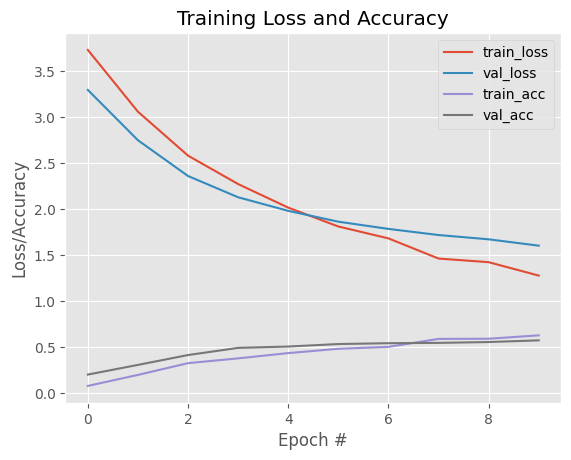

In [7]:
# Paso 8: Entrenar el Modelo Inicial
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Paso 9: Evaluar el Modelo
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Pérdida en validación: {val_loss}, Precisión en validación: {val_accuracy}')

# Almacenar el modelo empleando la función model.save de Keras
model.save(BASE_FOLDER + "yoga_pose_model_mobilenetv2.h5")

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
from sklearn.metrics import classification_report

# Efectuamos la predicción
predictions = model.predict(X_val, batch_size=32)
# Generar el reporte de clasificación
print(classification_report(y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))

# Graficar la pérdida y la precisión del entrenamiento
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 44s 475ms/step - accuracy: 0.1972 - loss: 3.1994 - val_accuracy: 0.3496 - val_loss: 2.4826
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.2205 - loss: 2.9654 - val_accuracy: 0.3659 - val_loss: 2.4009
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.2501 - loss: 2.8478 - val_accuracy: 0.3841 - val_loss: 2.3262
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - accuracy: 0.2557 - loss: 2.7694 - val_accuracy: 0.3841 - val_loss: 2.2586
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.2872 - loss: 2.6613 - val_accuracy: 0.3967 - val_loss: 2.2368
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 395ms/step - accuracy: 0.2991 - loss: 2.5789 - val_accuracy: 0.4040 - val_loss: 2.2189
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 362ms/step - accuracy: 0.3056 - loss: 2.5814 - val_accuracy: 0.3949 - val_loss: 2.1798
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - accuracy: 0.2804 - loss: 2.6305 - val_accuracy: 0.413

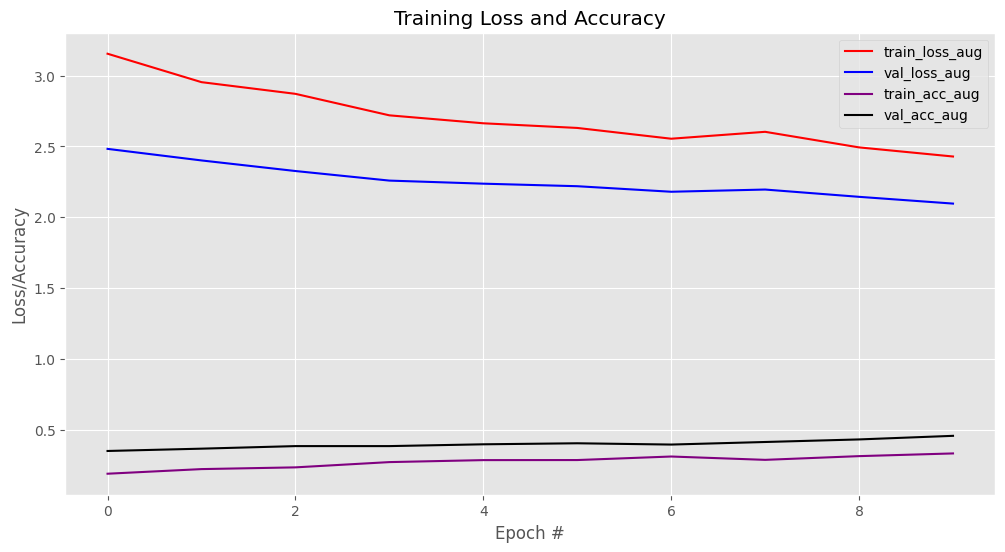

In [8]:
# Paso 10: Aplicar Data Augmentation y Entrenar el Modelo con Mejora
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos con Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=imagenet_utils.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=imagenet_utils.preprocess_input)

# Ajustar los generadores a los datos
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Entrenar el Modelo con Data Augmentation
history_aug = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

# Evaluar el modelo con Data Augmentation en el conjunto de validación
val_loss_aug, val_accuracy_aug = model.evaluate(val_generator, verbose=1)
print(f'Pérdida en validación (Data Augmentation): {val_loss_aug}, Precisión en validación (Data Augmentation): {val_accuracy_aug}')

# Efectuamos la predicción
predictions_aug = model.predict(val_generator, batch_size=32)

# Generar el reporte de clasificación
print(classification_report(y_val.argmax(axis=1), predictions_aug.argmax(axis=1), target_names=class_names))

# Graficar la pérdida y precisión del entrenamiento con Data Augmentation
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

# Graficar entrenamiento con Data Augmentation
plt.plot(history_aug.history["loss"], label="train_loss_aug", color='red')
plt.plot(history_aug.history["val_loss"], label="val_loss_aug", color='blue')
plt.plot(history_aug.history["accuracy"], label="train_acc_aug", color='purple')
plt.plot(history_aug.history["val_accuracy"], label="val_acc_aug", color='black')

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()